# Generate Simulated Data: Random-Plaintext-Dataset-5

In [2]:
#import python libraries

import unittest
import random
from random import randint
from random import gauss
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import os.path
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from tqdm import tnrange,tqdm_notebook

In [3]:
# Define lengh for the data set
data_leng = 100000
numberOfSamples = 50

# Define key for encryption
key = 23

# Position of the masked and leakage (index starts with 0)
fieldMaskedLekage = 24
fieldMasked = 4
fieldMasked2 = 44

#Random Plaintext
FixedPlaintext = False

# Define gauss niose
noiseStart = 0.0
noiseEnd = 5.0

# Define jitter shift range
activateJitter = False

if activateJitter == True:
    # Value for jitter 
    jitterLeft = -5
    jitterRight = 5
else:
    jitterLeft = None
    jitterRight = None

# If masked used True 
maskedValue = True

In [4]:
# Define settings table
settingsTable = pd.DataFrame([None])
settingsTable['data_leng'] = pd.DataFrame([data_leng])
settingsTable['numberOfSamples'] = numberOfSamples
settingsTable['key'] = key
settingsTable['noiseStart'] = noiseStart
settingsTable['noiseEnd'] = noiseEnd
settingsTable['jitterLeft'] = jitterLeft
settingsTable['jitterRight'] = jitterRight
settingsTable = settingsTable.drop(0,axis=True)

In [5]:
settingsTable

,data_leng,numberOfSamples,key,noiseStart,noiseEnd,jitterLeft,jitterRight
0,100000,50,23,0.0,5.0,None,None


In [6]:
# AES Sbox
AES_Sbox = np.array([
            0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
            0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
            0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
            0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
            0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
            0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
            0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
            0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
            0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
            0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
            0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
            0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
            0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
            0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
            0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
            0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
            ])

In [7]:
# Generate random plaintext
plaintext = []
fixedPlaintext = random.randint(0,255)
mask = []
mask2 = []
for x in range(data_leng):
    if FixedPlaintext == True:
        plaintext.append(fixedPlaintext)
    else:
        plaintext.append(random.randint(0,255))
    
    mask.append(random.randint(0,255))
    mask2.append(random.randint(0,255))

print("plaintext:",plaintext[0:5],'\nmask',mask[0:5],'\nmask2',mask2[0:5])

plaintext: [137, 164, 91, 15, 93] 
mask [13, 140, 178, 89, 212] 
mask2 [157, 122, 186, 113, 10]


In [8]:
# Verify size of plaintext
len(plaintext)

100000

In [9]:
#Generate leaked data with key=23 and labels
leakedData = []
#fixed key
key = 23
labels = []
for d in plaintext:
    leakedData.append(bin((AES_Sbox[d^key])).count("1")+gauss(noiseStart, noiseEnd))
    labels.append(bin(AES_Sbox[d^key]).count("1"))
print("leakedData:",leakedData[0:5],"\nlabels:",labels[0:5])

leakedData: [-0.9596362797303337, 2.126963846405325, 2.6986292089303117, 1.2255214294933054, 5.390399992385137] 
labels: [3, 5, 3, 5, 5]


In [10]:
# Verify size of leakedData 
len(leakedData)

100000

In [11]:
# Verify size of labels 
len(labels)

100000

In [12]:
maskedData = []
maskedNoise = []
maskedNoise2 = []
maskIndex = 0
for d in plaintext:
    maskedData.append((bin(((AES_Sbox[d^key])^mask[maskIndex]^mask2[maskIndex])).count("1"))+gauss(noiseStart,noiseEnd))
    maskedNoise.append((bin(mask[maskIndex]).count("1"))+gauss(noiseStart,noiseEnd))
    maskedNoise2.append((bin(mask2[maskIndex]).count("1"))+gauss(noiseStart,noiseEnd))
    maskIndex = maskIndex + 1
print("maskedData:",maskedData[0:5],"\nmaskedNoise:",maskedNoise[0:5],"\nmaskedNoise2:",maskedNoise2[0:5])

maskedData: [4.633479472056541, -0.3788947698774603, 7.534420758025089, -3.8016376688895477, -4.339796583729822] 
maskedNoise: [-10.950490929328286, -6.275432020764686, -4.695920254853542, -9.793873115558636, 7.011466465684644] 
maskedNoise2: [7.215889428836444, 4.879325664487541, -0.5813091582699741, 2.6600694061522643, 5.7903839059171]


In [13]:
# Generate random traces and repalce the t=25 with the leaked data
from collections import deque
rawTraces = []
randomJitter = []
# Loop to generate the traces
for i in tnrange(data_leng):
    rawData=[]
    
    #loop to repalce the sample
    for z in range(numberOfSamples):
        
        # replace sample at 5th position with the mask and added noise 
        if z == fieldMasked:
            rawData.append(maskedNoise[i])
            
        elif z == fieldMaskedLekage:
            rawData.append(maskedData[i])
            
        elif z == fieldMasked2:
            rawData.append(maskedNoise2[i])     
        # Else create random sample
        else:   
            rawData.append(bin(randint(0,255)).count("1")+gauss(noiseStart,noiseEnd))
    
    # Add jitter
    if activateJitter == True:
        item = deque(rawData)
        tmpJitter = random.randint(jitterLeft,jitterRight)
        item.rotate(tmpJitter)
        randomJitter.append(tmpJitter)
        
        #Full dataset with all traces 
        rawTraces.append(item)
    else:
        rawTraces.append(rawData)

print("First generated trace: ",rawTraces[0])
print("Second generated trace:",rawTraces[1])
print("Third generated trace: ",rawTraces[2])


First generated trace:  [13.20955789919669, -1.6537749292782014, -1.1092195758431913, -6.312091467190109, -10.950490929328286, -1.048520206124806, 1.5903301342628444, 3.745712222835624, -2.677945115296641, -4.7453631734823025, -3.9715022223307166, 5.03527099355065, 10.277416413319582, 6.442084624398261, 9.670920757639093, 5.571464370567199, 11.2751977411757, -3.270695948174044, 2.024043229103563, 9.776207206072197, 0.4865000127554904, 7.175998228105999, 6.103722829748055, 6.484634174187519, 4.633479472056541, -5.947759170303273, -1.3258146118993768, 1.0335179816153794, -3.117131159809583, 2.9613103254152318, 8.752016133364055, 10.449052349314822, 8.56764742099677, -0.5608709401056151, 5.076099232164429, 13.198680213725133, 4.954516608272005, 7.588279116397731, 2.1565501505227305, -1.3253024356651215, 0.6616310543617594, 9.893428742737779, 4.250828532983432, -0.540163568708302, 7.215889428836444, 13.141983733406203, 0.3153455717784759, 0.2904429692709516, 4.720293483393266, 11.76188069

In [14]:
# Verify size of leakedData 
len(rawTraces)

100000

## Plot Simulated Data

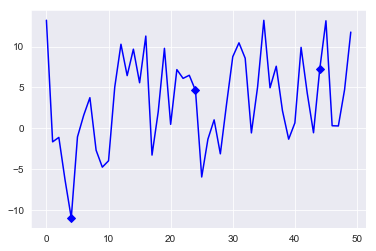

In [15]:
sns.set_style("darkgrid")
plt.plot(rawTraces[0],'-bD',markevery=[fieldMaskedLekage,fieldMasked,fieldMasked2])

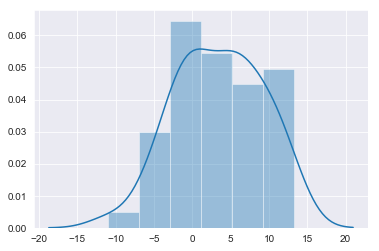

In [16]:
sns.distplot(rawTraces[0])

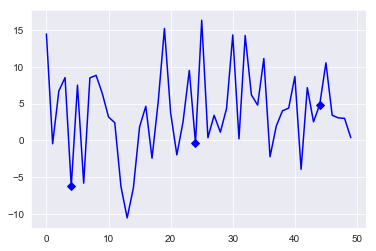

In [17]:
plt.plot(rawTraces[1],'-bD',markevery=[fieldMaskedLekage,fieldMasked,fieldMasked2])

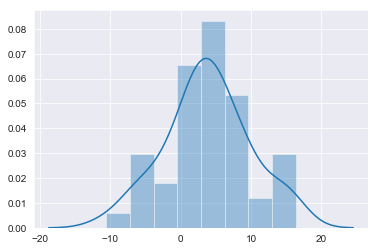

In [18]:
sns.distplot(rawTraces[1])

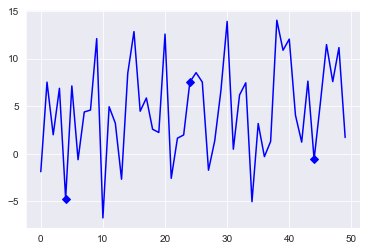

In [19]:
plt.plot(rawTraces[2],'-bD',markevery=[fieldMaskedLekage,fieldMasked,fieldMasked2])

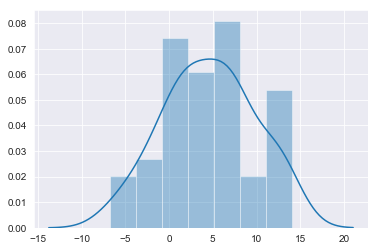

In [20]:
sns.distplot(rawTraces[2])

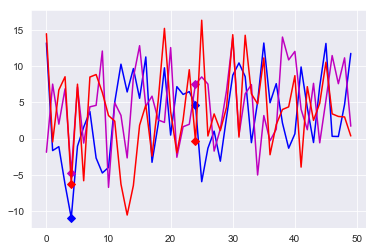

In [21]:
plt.plot(rawTraces[0],'-bD',rawTraces[2],'-mD',rawTraces[1],'-rD',markevery=[fieldMaskedLekage,fieldMasked])

### Data Path

In [22]:
#Set data path
dataPath = ''
if FixedPlaintext == True:
    dataPath = 'FixedPlaintext'
else:
    dataPath = 'RandomPlaintext'

### Unit Tests

In [23]:
class TestNotebook(unittest.TestCase):

    def test_LeakedData_size_equals_labels(self):
        self.assertEqual(len(leakedData), len(labels))
    def test_DataSize(self):
        self.assertEqual(len(leakedData), data_leng)    
        self.assertEqual(len(labels), data_leng)
    def test_FixedPlaintext(self):
        self.assertEqual(FixedPlaintext, False) 
    def test_Jitter(self):
        self.assertEqual(activateJitter, False)
    def test_Mask(self):
        self.assertEqual(maskedValue, True)
    def test_DataPath(self):
        self.assertEqual(dataPath, 'RandomPlaintext')
    
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_DataPath (__main__.TestNotebook) ... ok
test_DataSize (__main__.TestNotebook) ... ok
test_FixedPlaintext (__main__.TestNotebook) ... ok
test_Jitter (__main__.TestNotebook) ... ok
test_LeakedData_size_equals_labels (__main__.TestNotebook) ... ok
test_Mask (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.030s

OK


In [24]:
rawTraces = pd.DataFrame(rawTraces)
rawTraces['label'] = pd.DataFrame(plaintext)
rawTraces.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
0,13.209558,-1.653775,-1.109220,-6.312091,-10.950491,-1.048520,1.590330,3.745712,-2.677945,-4.745363,...,9.893429,4.250829,-0.540164,7.215889,13.141984,0.315346,0.290443,4.720293,11.761881,137
1,14.482197,-0.464543,6.718575,8.541940,-6.275432,7.515922,-5.818567,8.501585,8.847794,6.369752,...,-3.933452,7.173493,2.518681,4.879326,10.554037,3.421225,3.061588,2.992178,0.366712,164
2,-1.880624,7.523330,2.001004,6.875263,-4.695920,7.125264,-0.616828,4.391221,4.591958,12.093917,...,4.049263,1.226756,7.628508,-0.581309,5.285145,11.464499,7.580787,11.151115,1.715196,91
3,4.446611,0.862411,15.312905,3.777323,-9.793873,6.501538,1.885229,4.727147,2.479989,6.621450,...,5.286253,8.936340,2.415698,2.660069,8.908268,7.366031,5.844471,7.660444,-1.214834,15
4,-0.608669,10.097059,6.509925,3.429407,7.011466,4.524970,8.065379,-6.579509,10.046265,3.285251,...,-1.157726,-3.661637,1.803947,5.790384,9.674229,6.036866,3.211541,6.008918,7.423593,93


### Write Data 

In [25]:
simulated_traces = pd.DataFrame(rawTraces)
simulated_traces.to_csv('./'+dataPath+'/TS5.csv',index=False)